In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
print(len(X_train))
print(len(X_test))

60000
10000


In [5]:
X_train[0].shape

(28, 28)

Label:  5


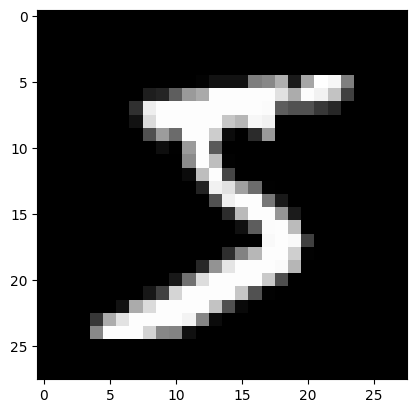

Label:  0


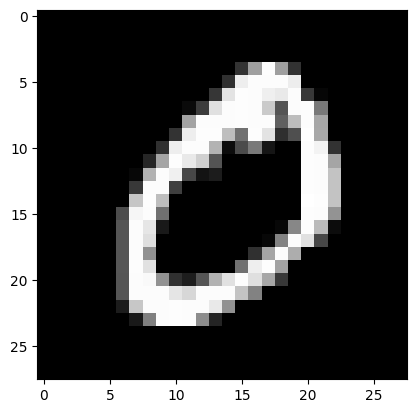

Label:  4


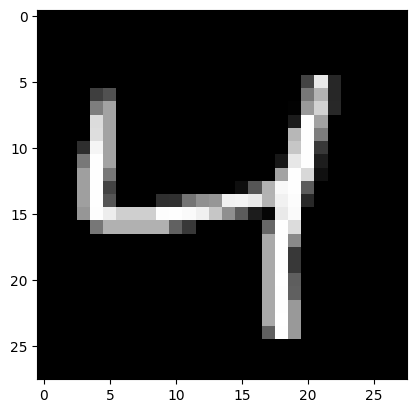

Label:  1


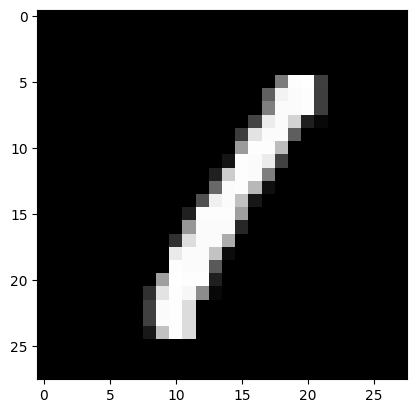

Label:  9


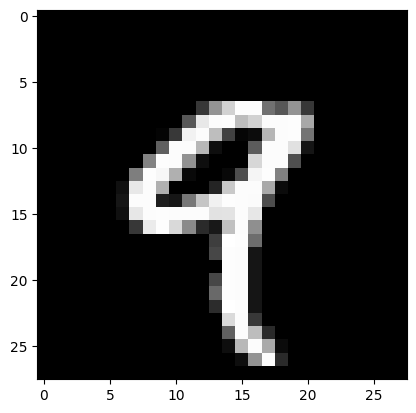

In [6]:
plt.gray()
for i in range(5): # showing first 5 images
  print("Label: ", y_train[i])
  plt.imshow(X_train[i])
  plt.show()

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
X_train_flatten = X_train.reshape(len(X_train), 28*28)
X_test_flatten = X_test.reshape(len(X_test), 28*28)

In [11]:
X_train_flatten.shape

(60000, 784)

In [12]:
X_test_flatten.shape

(10000, 784)

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=(784,), activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flatten, y_train, epochs=5)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8099 - loss: 0.7281
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9156 - loss: 0.3082
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9199 - loss: 0.2841
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9210 - loss: 0.2776
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9242 - loss: 0.2708


In [14]:
model.evaluate(X_test_flatten, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9141 - loss: 0.3076


[0.269591361284256, 0.9248999953269958]

In [15]:
prediction = model.predict(X_test_flatten)
prediction

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[2.92639099e-02, 3.01130598e-07, 1.11373447e-01, ...,
        9.99792516e-01, 9.03911591e-02, 6.56153381e-01],
       [4.82513607e-01, 6.11937605e-03, 9.99467134e-01, ...,
        8.84156030e-13, 1.18471324e-01, 2.07066631e-09],
       [5.29421319e-04, 9.93628442e-01, 7.27883995e-01, ...,
        1.56156257e-01, 4.44612265e-01, 5.09563573e-02],
       ...,
       [6.16467059e-06, 4.79345226e-06, 2.82418542e-03, ...,
        2.98749566e-01, 5.88364780e-01, 7.98665702e-01],
       [2.10839222e-04, 2.27554177e-04, 3.44642933e-04, ...,
        4.18836862e-05, 6.72871232e-01, 1.07439097e-04],
       [1.66723784e-02, 3.44157813e-10, 2.78333902e-01, ...,
        1.48828825e-08, 2.44770374e-04, 5.05922799e-07]], dtype=float32)

In [16]:
y_predicted = [np.argmax(i) for i in prediction]
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.97      0.98      0.98      1135
           2       0.93      0.90      0.92      1032
           3       0.86      0.93      0.90      1010
           4       0.93      0.93      0.93       982
           5       0.93      0.85      0.89       892
           6       0.94      0.95      0.95       958
           7       0.93      0.93      0.93      1028
           8       0.89      0.88      0.88       974
           9       0.91      0.90      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.92      0.92     10000



In [17]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted)

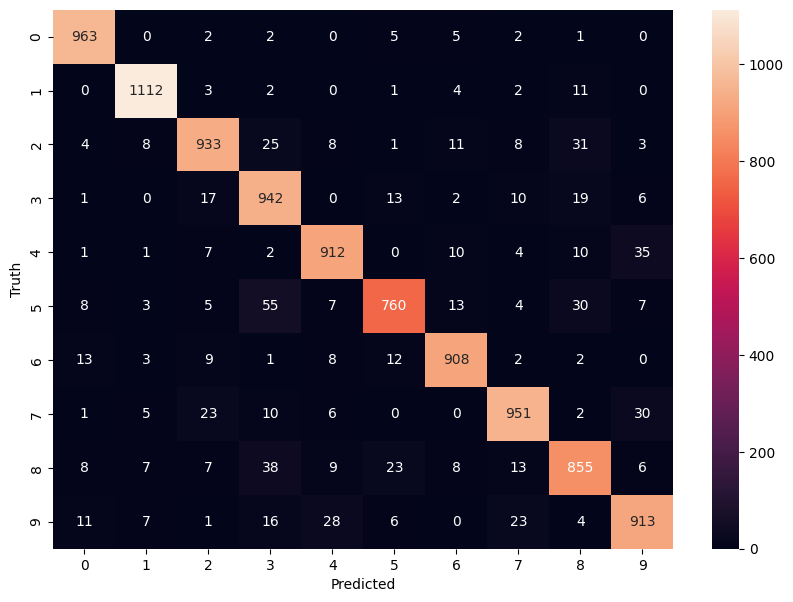

In [18]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100, activation='relu'), # hidden layer
    tf.keras.layers.Dense(10, activation='sigmoid') # final oytput layer
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8726 - loss: 0.4512
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9612 - loss: 0.1340
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9729 - loss: 0.0895
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9810 - loss: 0.0624
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9858 - loss: 0.0482


In [20]:
y_predicted = [np.argmax(i) for i in prediction]
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.97      0.98      0.98      1135
           2       0.93      0.90      0.92      1032
           3       0.86      0.93      0.90      1010
           4       0.93      0.93      0.93       982
           5       0.93      0.85      0.89       892
           6       0.94      0.95      0.95       958
           7       0.93      0.93      0.93      1028
           8       0.89      0.88      0.88       974
           9       0.91      0.90      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.92      0.92     10000



In [21]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted)

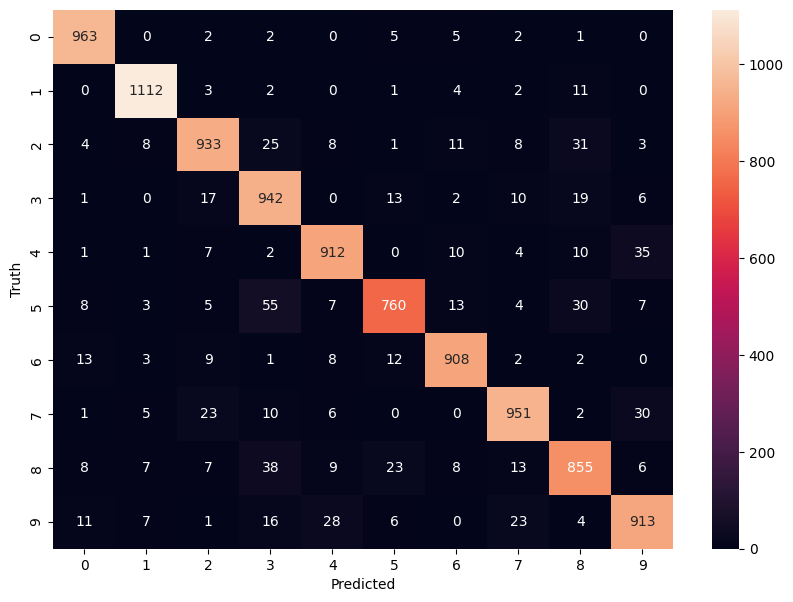

In [22]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

Label:  5


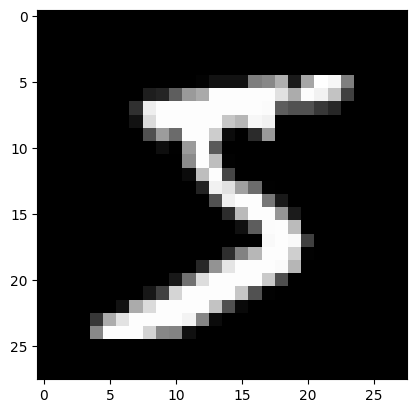

In [43]:
plt.gray()
print("Label: ", y_train[0])
plt.imshow(X_train[0])
plt.show()

In [55]:
augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(0.3),             # rotate up to 30%
])

Label:  5


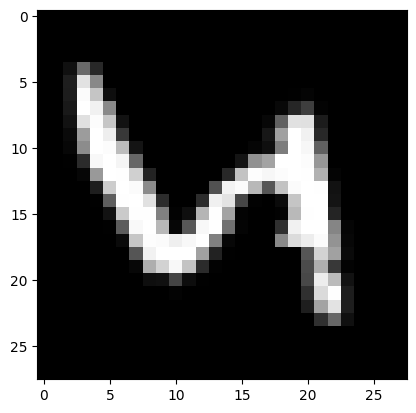

In [56]:
plt.gray()
img = np.expand_dims(X_train[0], axis=-1) # converting image to (28, 28, 1)
augmented_img = augmentation(img)
plt.imshow(augmented_img.numpy().squeeze(), cmap='gray') # .numpy() function creates numpy array and .squeeza() function does (28, 28, 1) -> (28, 28)
print("Label: ", y_train[0])
plt.show()